# Predicting credit Card Approval Using Machine Learning

## Predicting-credit-card-approval

#### In this project I have made a machine learning model to predict if a credit card application will get approved or not using Supervised Learning with scikit-learn and Data Manipulation with pandas.

## Project Description 

#### Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual’s credit report, for example. Manually analyzing these applications is error-prone, and time consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this project, I will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.

## Motivation

#### Banking industries received so many applications for credit card request. Going through each request manually can be very time consuming, also prone to human errors. However, if we can use the historical data to build a model which can shortlist the candidates for approval that can be great.

## Steps: 

#### Exploratory data analysis (EDA) :  the process of going through a dataset and finding out more about it.

#### Model training: create models to learn to predict a target variable based on other variables.

#### Model evaluation :evaluating a models predictions using problem-specific evaluation metrics.

#### Model comparison:comparing several different models to find the best one.

#### Model fine-tuning :once we've found a good model, how can we improve it?

#### Feature importance :since we're predicting the presence of heart disease, are there some things which are more important for prediction.

#### Cross-validation : if we do build a good model, can we be sure it will work on unseen data?

#### Report : Final conclusion of the project

##  Problem Definition

#### In our case, the problem we will be exploring is binary classification

#### This is because we're going to be using a number of differnet features about a customer to predict whether they are creditworthy or not.

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load the data

In [525]:
df1=pd.read_csv('credit_card.csv') ## Independent data (all features are input features )

In [3]:
df1

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  
0                  2  
1                  2  
2                  2  
3                  2  
4                  2  
...              ...  
1543               2  
1544               1  
1545               4  
1546               2  
1547               2  

[1548 rows x 18 columns]

In [4]:
df2=pd.read_csv('credit_card_label.csv')## Dependent data (Y - column )

In [5]:
df2

Ind_ID  label
0     5008827      1
1     5009744      1
2     5009746      1
3     5009749      1
4     5009752      1
...       ...    ...
1543  5028645      0
1544  5023655      0
1545  5115992      0
1546  5118219      0
1547  5053790      0

[1548 rows x 2 columns]

In [6]:
## have to merge the input and output data

In [7]:
data = pd.merge(df1,df2,on='Ind_ID')

In [8]:
data

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0         365243   
1                  Married  House / apartment        -13557.0           -586   
2                  Married  House / apartment             NaN           -586   
3                  Married  House / apartment        -13557.0           -586   
4                  Married  House / apartment        -13557.0           -586   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

## Data Exploration (Exploratory Data Analysis or EDA)

In [9]:
data.head() ###  check the top 5 rows of our dataframe

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [10]:
data.shape ## check the shape of data

(1548, 19)

In [11]:
data.describe() ## to have a statistical summary about the data

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.548000e+03  1548.000000   1.525000e+03     1526.000000   
mean   5.078920e+06     0.412791   1.913993e+05   -16040.342071   
std    4.171759e+04     0.776691   1.132530e+05     4229.503202   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045070e+06     0.000000   1.215000e+05   -19553.000000   
50%    5.078842e+06     0.000000   1.665000e+05   -15661.500000   
75%    5.115673e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1548.000000        1548.0  1548.000000  1548.000000  1548.000000   
mean    59364.689922           1.0     0.208010     0.309432     0.092377   
std    137808.062701           0.0     0.406015     0.462409     0.289651   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3174.500000           1.0     0.000000     0.000000     0.000000   
50%     -1565.000000           1.0     0.000000     0.000000     0.000000   
75%      -431.750000           1.0     0.000000     1.000000     0.000000   
max    365243.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1548.000000  1548.000000  
mean         2.161499     0.113049  
std          0.947772     0.316755  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

In [12]:
data.tail()  ###  check the last 5 rows of our dataframe

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
1543               Married  House / apartment        -11957.0          -2182   
1544  Single / not married  House / apartment        -10229.0          -1209   
1545               Married  House / apartment        -13174.0          -2477   
1546        Civil marriage  House / apartment        -15292.0           -645   
1547               Married  House / apartment        -16601.0          -2859   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0

#### while checking the emplyed days column it is seen that there is a value'365243' repeating for many rows. 
#### it means excel has given a default value to that .. so it should be converted to Nan , then treat it as missing value.

In [14]:
data[data['Employed_days']==365243]

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
7     5009894      F         N             N         0       180000.0   
26    5024916      F         N             Y         0       112500.0   
27    5024917      F         N             Y         0            NaN   
31    5029311      F         N             Y         0       112500.0   
...       ...    ...       ...           ...       ...            ...   
1509  5024077      F         Y             Y         0       157500.0   
1511  5053535      F         N             Y         0       216000.0   
1514  5051097      F         N             N         0        69750.0   
1525  5023719      F         Y             Y         0       175500.0   
1531  5048642      F         N             N         0       157500.0   

     Type_Income                      EDUCATION        Marital_status  \
0      Pensioner               Higher education               Married   
7      Pensioner  Secondary / secondary special               Married   
26     Pensioner  Secondary / secondary special               Married   
27     Pensioner  Secondary / secondary special               Married   
31     Pensioner  Secondary / secondary special               Married   
...          ...                            ...                   ...   
1509   Pensioner  Secondary / secondary special                 Widow   
1511   Pensioner               Higher education  Single / not married   
1514   Pensioner  Secondary / secondary special                 Widow   
1525   Pensioner               Higher education               Married   
1531   Pensioner  Secondary / secondary special             Separated   

             Housing_type  Birthday_count  Employed_days  Mobile_phone  \
0       House / apartment        -18772.0         365243             1   
7       House / apartment        -22134.0         365243             1   
26      House / apartment        -21832.0         365243             1   
27      House / apartment        -21832.0         365243             1   
31      House / apartment        -21876.0         365243             1   
...                   ...             ...            ...           ...   
1509    House / apartment        -20432.0         365243             1   
1511    House / apartment        -20388.0         365243             1   
1514  Municipal apartment        -21986.0         365243             1   
1525    House / apartment        -22077.0         365243             1   
1531    House / apartment        -24048.0         365243             1   

      Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  label  
0              0      0         0             NaN               2      1  
7              0      0         0             NaN               2      1  
26             0      1         0             NaN               2      1  
27             0      1         0             NaN               2      1  
31             0      1         1             NaN               2      1  
...          ...    ...       ...             ...             ...    ...  
1509           0      0         0             NaN               1      0  
1511           0      0         0             NaN               1      0  
1514           0      1         0             NaN               1      0  
1525           0      1         0             NaN               2      0  
1531           0      0         0             NaN               1      0  

[261 rows x 19 columns]

In [15]:
data['Employed_days'].replace(365243,np.nan,inplace=True) ## replace with Nan where this value present

In [16]:
data

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
2     5009746      F         Y             N         0       315000.0   
3     5009749      F         Y             N         0            NaN   
4     5009752      F         Y             N         0       315000.0   
...       ...    ...       ...           ...       ...            ...   
1543  5028645      F         N             Y         0            NaN   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
2     Commercial associate               Higher education   
3     Commercial associate               Higher education   
4     Commercial associate               Higher education   
...                    ...                            ...   
1543  Commercial associate               Higher education   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0            NaN   
1                  Married  House / apartment        -13557.0         -586.0   
2                  Married  House / apartment             NaN         -586.0   
3                  Married  House / apartment        -13557.0         -586.0   
4                  Married  House / apartment        -13557.0         -586.0   
...                    ...                ...             ...            ...   
1543               Married  House / apartment        -11957.0        -2182.0   
1544  Single / not married  House / apartment        -10229.0        -1209.0   
1545               Married  House / apartment        -13174.0        -2477.0   
1546        Civil marriage  House / apartment        -15292.0         -645.0   
1547               Married  House / apartment        -16601.0        -2859.0   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0             NaN   
1                1           1      1         0             NaN   
2                1           1      1         0             NaN   
3                1           1      1         0             NaN   
4                1           1      1         0             NaN   
...            ...         ...    ...       ...             ...   
1543             1           0      0         0        Managers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0             NaN   

      Family_Members  label  
0                  2      1  
1                  2      1  
2                  2      1  
3                  2      1  
4                  2      1  
...              ...    ...  
1543               2      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1548 rows x 19 columns]

In [18]:
data.isnull().sum()/len(data)*100  ## to check and count the percentage of missing values in each column 

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days      16.860465
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

<Axes: >

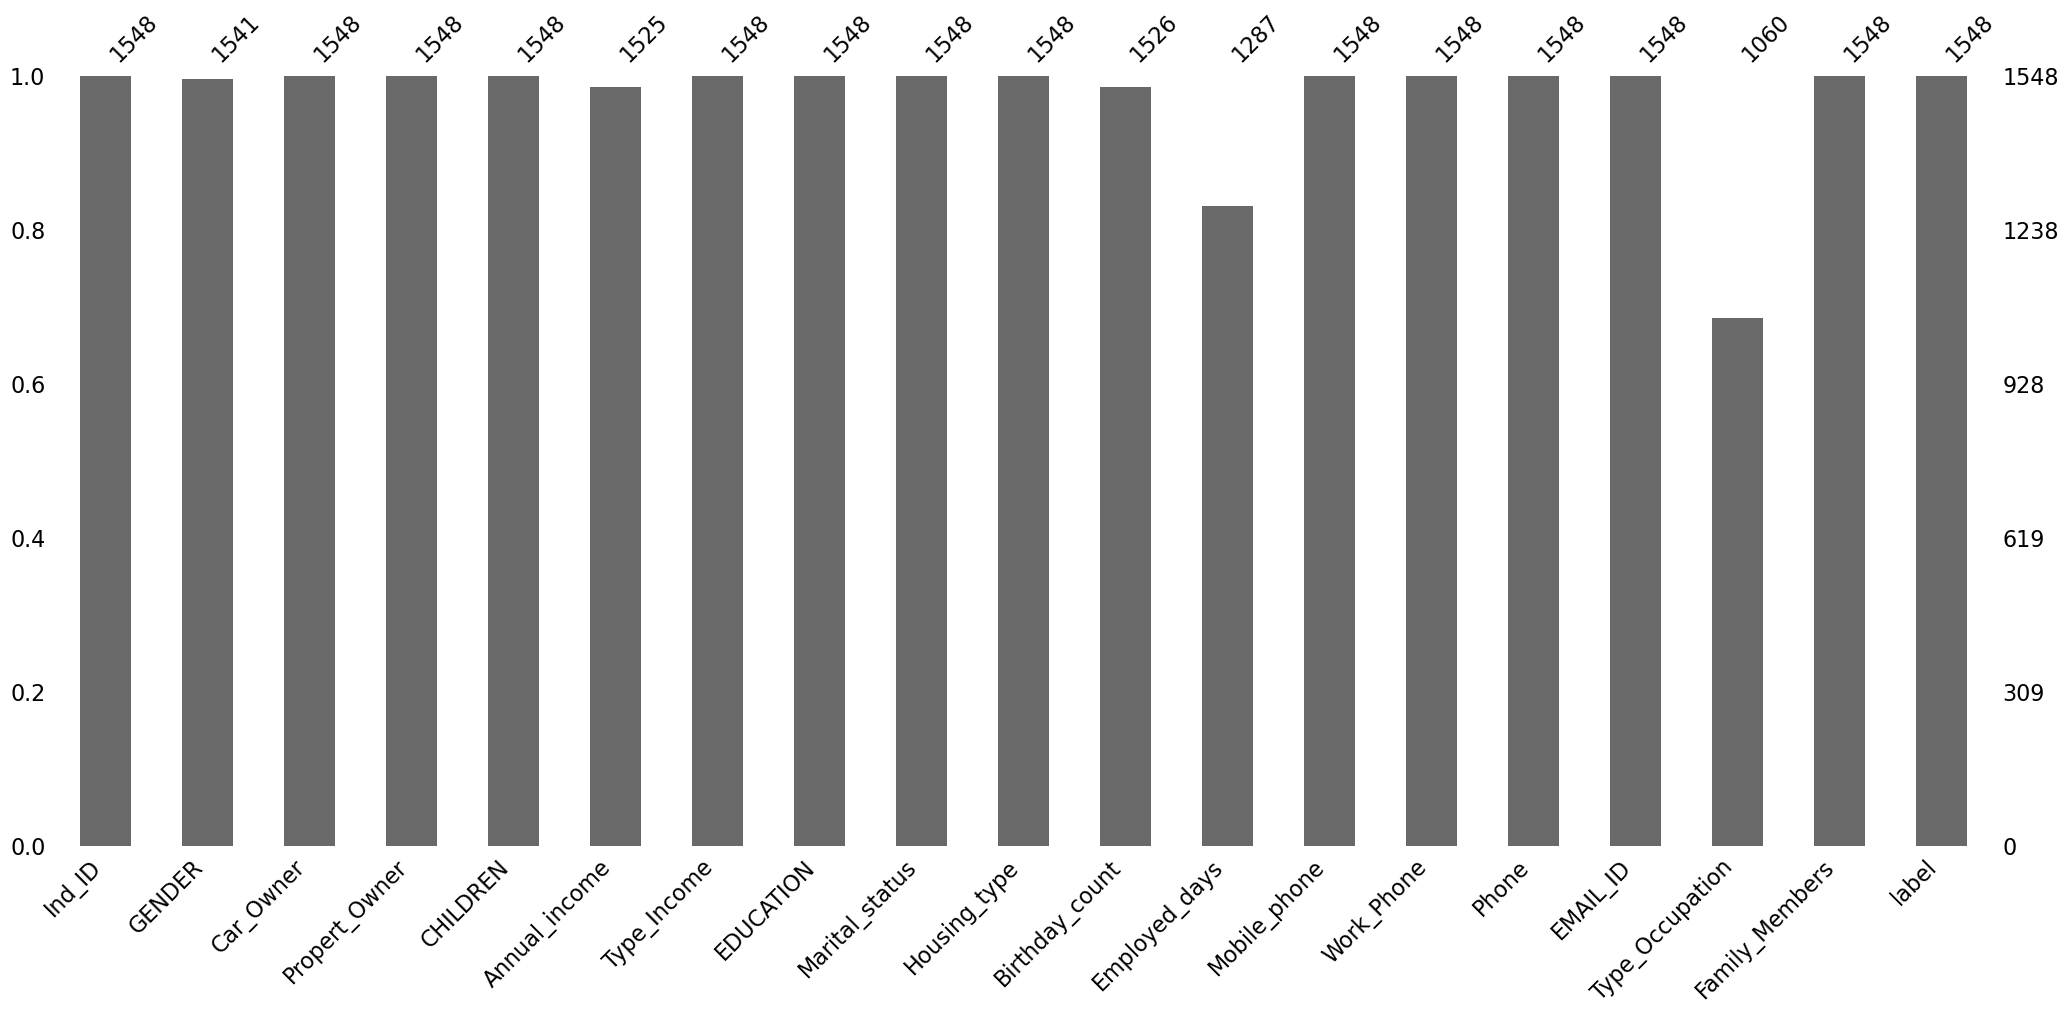

In [19]:
import missingno as msno   ## importing library to handle missing values
msno.bar(data)


In [21]:
data['Type_Occupation'].value_counts() ## to see  the value counts in occupation column

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [22]:
data.info() ## to check the datatype of columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1287 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

#### Type_occupation is a categorical column so mode imputation is used to fill missings.

In [23]:
data['Type_Occupation']=data['Type_Occupation'].fillna(data['Type_Occupation'].mode()[0])

In [24]:
data.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days      261
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation      0
Family_Members       0
label                0
dtype: int64

In [26]:
data['Employed_days'].median()  ## find median of this column

-1953.0

In [ ]:
## used box plot to locate outliers in Employed_days column

In [27]:
import seaborn as sns

<Axes: >

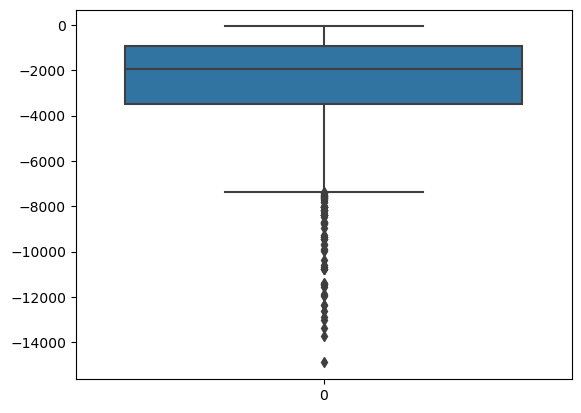

In [28]:
sns.boxplot(data['Employed_days'])

In [29]:
## to check distribution of 'Employed_days' column 

#### hence this column has outliers so median imputation is used to fill miss values

In [31]:
data['Employed_days']=data['Employed_days'].fillna(data['Employed_days'].median())

#### since rest of the three col has less than 2 % miss values so the rows can be deleted.

In [36]:
data = data.dropna() ## to drop the rows which have even one missing values

In [38]:
data.isnull().sum() ## we can see that now the data has no missing values

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

#### Now the data has no missing values

In [41]:
data.describe() ## to have a quick view of columns which have outliers

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.496000e+03  1496.000000   1.496000e+03     1496.000000   
mean   5.079217e+06     0.415775   1.907750e+05   -16036.192513   
std    4.168109e+04     0.780784   1.131384e+05     4226.506557   
min    5.008827e+06     0.000000   3.375000e+04   -24946.000000   
25%    5.045349e+06     0.000000   1.210500e+05   -19543.000000   
50%    5.079010e+06     0.000000   1.660500e+05   -15686.000000   
75%    5.115801e+06     1.000000   2.250000e+05   -12417.000000   
max    5.150412e+06    14.000000   1.575000e+06    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1496.000000        1496.0  1496.000000  1496.000000  1496.000000   
mean    -2563.189840           1.0     0.205882     0.304813     0.094251   
std      2218.642455           0.0     0.404480     0.460482     0.292276   
min    -14887.000000           1.0     0.000000     0.000000     0.000000   
25%     -3229.250000           1.0     0.000000     0.000000     0.000000   
50%     -1953.000000           1.0     0.000000     0.000000     0.000000   
75%     -1169.500000           1.0     0.000000     1.000000     0.000000   
max       -73.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1496.000000  1496.000000  
mean         2.165107     0.106952  
std          0.951752     0.309155  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

<Axes: >

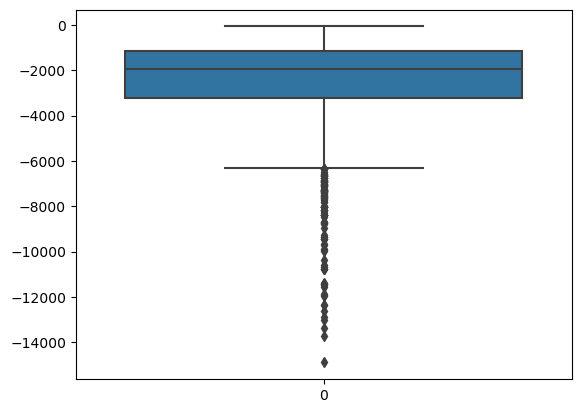

In [42]:
sns.boxplot(data['Employed_days']) ## we can see that this column have a lot of outliers

### Outlier Detection and removal with IQR

In [43]:
Q1 = data['Employed_days'].quantile(0.25) 
Q3 = data['Employed_days'].quantile(0.75)

In [44]:
Q1,Q3 

(-3229.25, -1169.5)

In [45]:
IQR = Q3-Q1

In [46]:
IQR

2059.75

In [47]:
low_lim = Q1 - 1.5 * IQR
high_lim = Q3 + 1.5 * IQR

In [48]:
data = data[(data['Employed_days'] > low_lim) & (data['Employed_days'] < high_lim)] ## select the rows greater than lower fence and 
                                                                                    ## less than higher fence.

In [49]:
data

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
4     5009752      F         Y             N         0       315000.0   
6     5009754      F         Y             N         0       315000.0   
7     5009894      F         N             N         0       180000.0   
...       ...    ...       ...           ...       ...            ...   
1542  5118268      M         Y             N         1       360000.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
4     Commercial associate               Higher education   
6     Commercial associate               Higher education   
7                Pensioner  Secondary / secondary special   
...                    ...                            ...   
1542         State servant  Secondary / secondary special   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0        -1953.0   
1                  Married  House / apartment        -13557.0         -586.0   
4                  Married  House / apartment        -13557.0         -586.0   
6                  Married  House / apartment        -13557.0         -586.0   
7                  Married  House / apartment        -22134.0        -1953.0   
...                    ...                ...             ...            ...   
1542               Married  House / apartment        -11294.0        -3536.0   
1544  Single / not married  House / apartment        -10229.0        -1209.0   
1545               Married  House / apartment        -13174.0        -2477.0   
1546        Civil marriage  House / apartment        -15292.0         -645.0   
1547               Married  House / apartment        -16601.0        -2859.0   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0        Laborers   
1                1           1      1         0        Laborers   
4                1           1      1         0        Laborers   
6                1           1      1         0        Laborers   
7                1           0      0         0        Laborers   
...            ...         ...    ...       ...             ...   
1542             1           0      1         0         Drivers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0        Laborers   

      Family_Members  label  
0                  2      1  
1                  2      1  
4                  2      1  
6                  2      1  
7                  2      1  
...              ...    ...  
1542               3      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1382 rows x 19 columns]

In [ ]:
#### Kernel density estimator is used to see the distibution

<Axes: xlabel='Annual_income', ylabel='Density'>

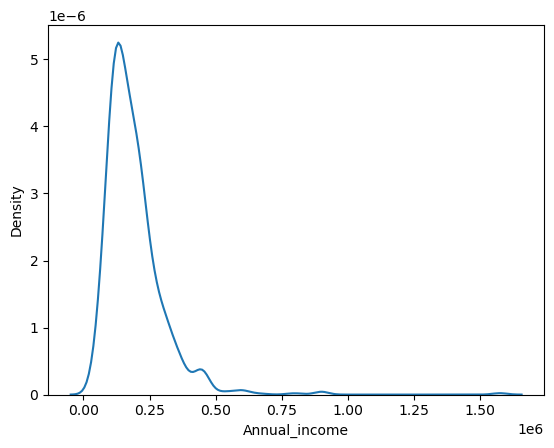

In [52]:
sns.kdeplot(data['Annual_income'])

#### we can see that annual income column has outliers on tail.

#### Inter quartile range is used to remove outliers

In [53]:
Q1 = data['Annual_income'].quantile(0.25)
Q3 = data['Annual_income'].quantile(0.75)

In [54]:
Q1,Q3

(117000.0, 225000.0)

In [55]:
IQR = Q3-Q1

In [56]:
IQR

108000.0

In [57]:
low_lim = Q1 - 1.5 * IQR
high_lim = Q3 + 1.5 * IQR

In [58]:
data = data[(data['Annual_income'] > low_lim) & (data['Annual_income'] < high_lim)]

In [59]:
data

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
4     5009752      F         Y             N         0       315000.0   
6     5009754      F         Y             N         0       315000.0   
7     5009894      F         N             N         0       180000.0   
...       ...    ...       ...           ...       ...            ...   
1542  5118268      M         Y             N         1       360000.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
4     Commercial associate               Higher education   
6     Commercial associate               Higher education   
7                Pensioner  Secondary / secondary special   
...                    ...                            ...   
1542         State servant  Secondary / secondary special   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type  Birthday_count  Employed_days  \
0                  Married  House / apartment        -18772.0        -1953.0   
1                  Married  House / apartment        -13557.0         -586.0   
4                  Married  House / apartment        -13557.0         -586.0   
6                  Married  House / apartment        -13557.0         -586.0   
7                  Married  House / apartment        -22134.0        -1953.0   
...                    ...                ...             ...            ...   
1542               Married  House / apartment        -11294.0        -3536.0   
1544  Single / not married  House / apartment        -10229.0        -1209.0   
1545               Married  House / apartment        -13174.0        -2477.0   
1546        Civil marriage  House / apartment        -15292.0         -645.0   
1547               Married  House / apartment        -16601.0        -2859.0   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0        Laborers   
1                1           1      1         0        Laborers   
4                1           1      1         0        Laborers   
6                1           1      1         0        Laborers   
7                1           0      0         0        Laborers   
...            ...         ...    ...       ...             ...   
1542             1           0      1         0         Drivers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0        Laborers   

      Family_Members  label  
0                  2      1  
1                  2      1  
4                  2      1  
6                  2      1  
7                  2      1  
...              ...    ...  
1542               3      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1315 rows x 19 columns]

In [60]:
data.describe() ## we can see that now the data has no outliers.

Ind_ID     CHILDREN  Annual_income  Birthday_count  \
count  1.315000e+03  1315.000000    1315.000000     1315.000000   
mean   5.078908e+06     0.403042  174604.123574   -15928.488973   
std    4.157915e+04     0.783383   72572.383220     4322.200327   
min    5.008827e+06     0.000000   33750.000000   -24946.000000   
25%    5.045254e+06     0.000000  112500.000000   -19604.000000   
50%    5.069292e+06     0.000000  157500.000000   -15366.000000   
75%    5.115666e+06     1.000000  225000.000000   -12262.000000   
max    5.150412e+06    14.000000  382500.000000    -7705.000000   

       Employed_days  Mobile_phone   Work_Phone        Phone     EMAIL_ID  \
count    1315.000000        1315.0  1315.000000  1315.000000  1315.000000   
mean    -2070.008365           1.0     0.202281     0.293536     0.088213   
std      1343.177560           0.0     0.401854     0.455555     0.283712   
min     -6317.000000           1.0     0.000000     0.000000     0.000000   
25%     -2653.500000           1.0     0.000000     0.000000     0.000000   
50%     -1953.000000           1.0     0.000000     0.000000     0.000000   
75%     -1113.500000           1.0     0.000000     1.000000     0.000000   
max       -73.000000           1.0     1.000000     1.000000     1.000000   

       Family_Members        label  
count     1315.000000  1315.000000  
mean         2.156654     0.101901  
std          0.951539     0.302633  
min          1.000000     0.000000  
25%          2.000000     0.000000  
50%          2.000000     0.000000  
75%          3.000000     0.000000  
max         15.000000     1.000000

<Axes: xlabel='Annual_income', ylabel='Density'>

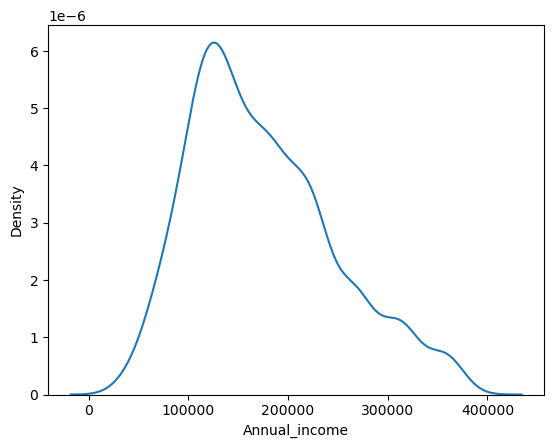

In [61]:
sns.kdeplot(data['Annual_income'])

#### Now the data is cleaned , it has no outlier and missing values

#### Export the data to CSV file

In [63]:
data.to_csv(r'C:\Users\papai\Desktop\New folder (2)\cleaned_data.csv', index=False)

### Gender vs Car owner 

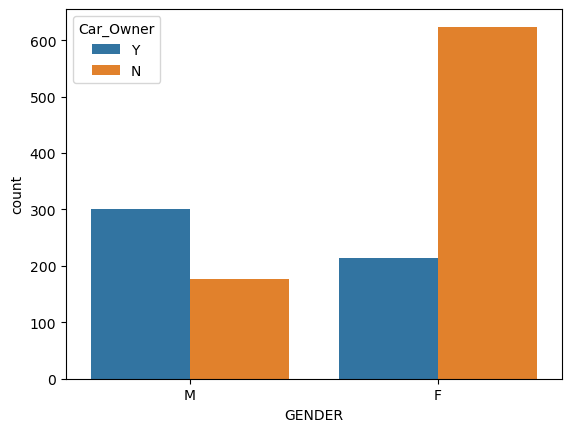

In [65]:
sns.countplot(x = 'GENDER', data = data, hue = 'Car_Owner')
plt.show()

#### we can see that ther are more male customers are having cars as compared to female customers

## Credit Approval Frequency according to Gender

#### We will compare our gender column with target column to see which gender is more creditworthy to bank.

In [527]:
data.GENDER.value_counts()

F    838
M    477
Name: GENDER, dtype: int64

### There are 477 males and 838 females in our study

In [68]:
# Compare target column with sex column
pd.crosstab(data.label, data.GENDER)

GENDER    F    M
label           
0       759  422
1        79   55

#### Since there are about 850 women and 760 of them are a good customer,having a good value of cibil score and they are creditworthywe might infer, based on this one variable if the participant is a woman, there's a 90% chance she will be a good customer and   can be given a credit card.

#### As for males, there's about 480 total with around about 420 are good customers (creditworthy). So we might predict, if the new customer is male, 87.5% of the time he can be given credit card.

#### Averaging these two values, we can assume, based on no other parameters, if there's a person comes, there's a 89% chance they can be given credit card.

#### to see the count between gender and target in a visualis format

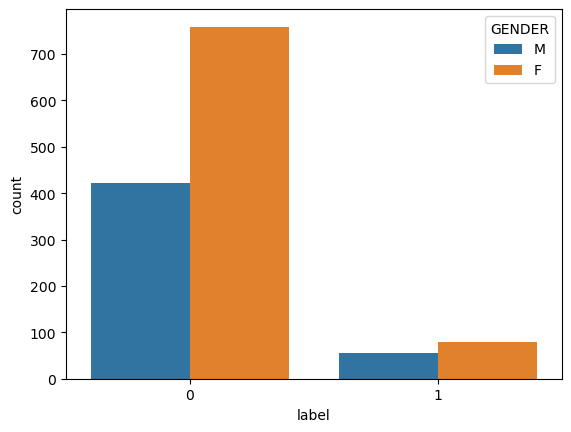

In [69]:
sns.countplot(x = 'label', data = data, hue = 'GENDER')
plt.show()

#### since the birthday count column use back count from current date . so it can be divide by 365 in order to get the age.

In [71]:
data[['Birthday_count','Employed_days']] = data[['Birthday_count','Employed_days']].div(-365,axis=0)

C:\Users\papai\AppData\Local\Temp\ipykernel_9776\3941418353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Birthday_count','Employed_days']] = data[['Birthday_count','Employed_days']].div(-365,axis=0)


In [72]:
data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
4  5009752      F         Y             N         0       315000.0   
6  5009754      F         Y             N         0       315000.0   
7  5009894      F         N             N         0       180000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1  Commercial associate               Higher education        Married   
4  Commercial associate               Higher education        Married   
6  Commercial associate               Higher education        Married   
7             Pensioner  Secondary / secondary special        Married   

        Housing_type  Birthday_count  Employed_days  Mobile_phone  Work_Phone  \
0  House / apartment       51.430137       5.350685             1           0   
1  House / apartment       37.142466       1.605479             1           1   
4  House / apartment       37.142466       1.605479             1           1   
6  House / apartment       37.142466       1.605479             1           1   
7  House / apartment       60.641096       5.350685             1           0   

   Phone  EMAIL_ID Type_Occupation  Family_Members  label  
0      0         0        Laborers               2      1  
1      1         0        Laborers               2      1  
4      1         0        Laborers               2      1  
6      1         0        Laborers               2      1  
7      0         0        Laborers               2      1

#### Rename the Birthday_count column to Age &  Employed_days column to work_exp_years

In [73]:
data.rename(columns={'Birthday_count':'Age','Employed_days':'work_exp_years'},inplace=True)

C:\Users\papai\AppData\Local\Temp\ipykernel_9776\72437478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Birthday_count':'Age','Employed_days':'work_exp_years'},inplace=True)


In [74]:
data.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
4  5009752      F         Y             N         0       315000.0   
6  5009754      F         Y             N         0       315000.0   
7  5009894      F         N             N         0       180000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1  Commercial associate               Higher education        Married   
4  Commercial associate               Higher education        Married   
6  Commercial associate               Higher education        Married   
7             Pensioner  Secondary / secondary special        Married   

        Housing_type        Age  work_exp_years  Mobile_phone  Work_Phone  \
0  House / apartment  51.430137        5.350685             1           0   
1  House / apartment  37.142466        1.605479             1           1   
4  House / apartment  37.142466        1.605479             1           1   
6  House / apartment  37.142466        1.605479             1           1   
7  House / apartment  60.641096        5.350685             1           0   

   Phone  EMAIL_ID Type_Occupation  Family_Members  label  
0      0         0        Laborers               2      1  
1      1         0        Laborers               2      1  
4      1         0        Laborers               2      1  
6      1         0        Laborers               2      1  
7      0         0        Laborers               2      1

#### We can see that the column has been renamed .

### Age VS Annual income 

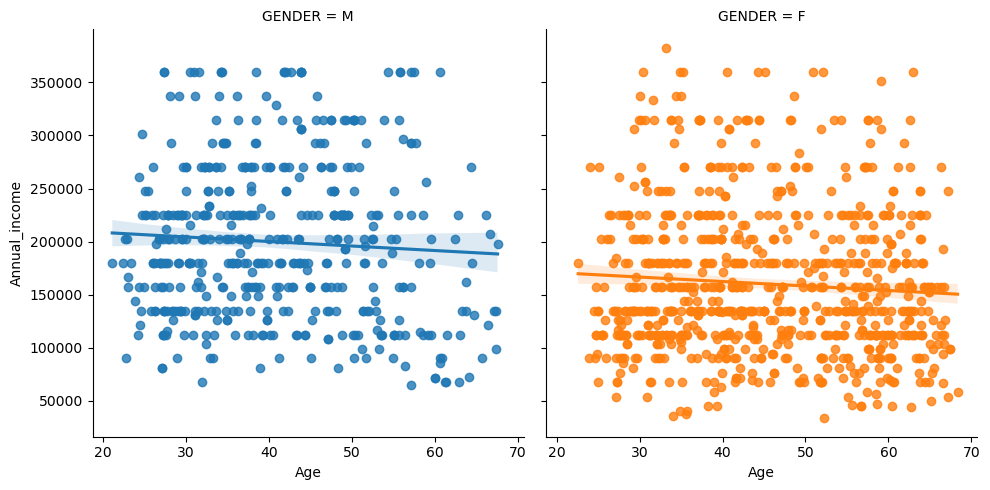

In [76]:
sns.lmplot(x = 'Age', y = 'Annual_income', data = data,hue='GENDER',col='GENDER')
plt.show()

In [77]:
data['Age'].corr(data['Annual_income'])

-0.11426994953460573

#### We can see that there is a silght negative relationship between the Age & Annual income

#### To check distribution of age Distribution plot is used

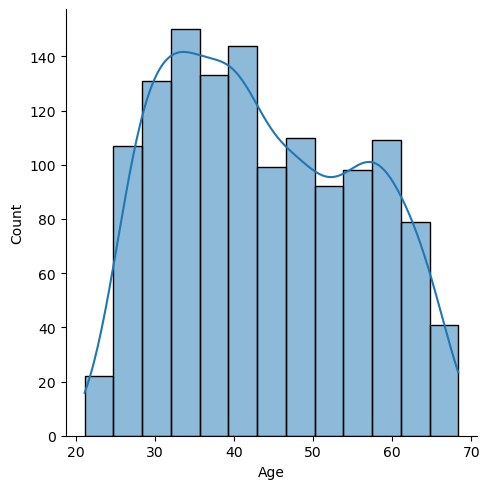

In [79]:
sns.displot(data['Age'],kde=True)

#### We can see that its almost normal distribution

### Categories of Education column and count : 

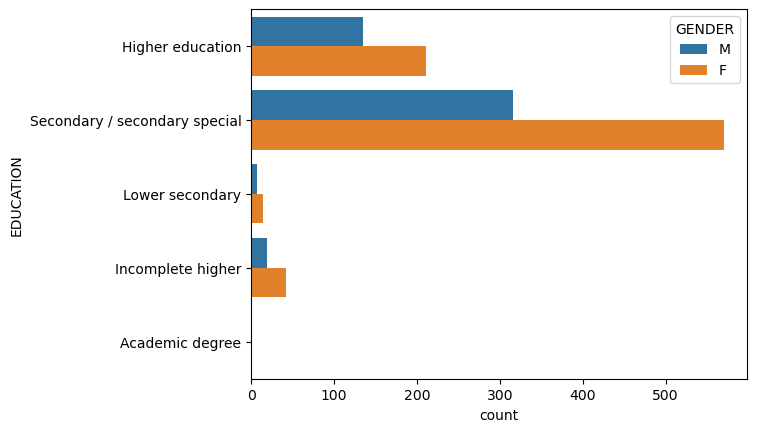

In [81]:
sns.countplot(y = 'EDUCATION', data = data, hue = 'GENDER')
plt.show()

#### We can see that most of customers have qualified with secondary examination & in 2nd place there are some customers who have completed higher education. Among them females are more educated than males

### Work experience VS Annual income 

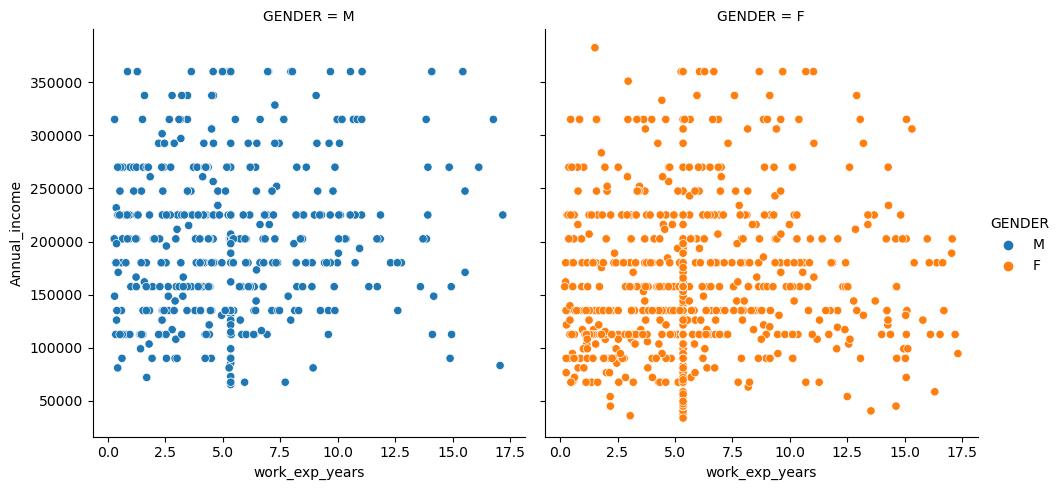

In [538]:
sns.relplot(x = 'work_exp_years', y = 'Annual_income', data = data, kind = 'scatter', hue = 'GENDER', col = 'GENDER')
plt.show()

#### We can see that there are huge customers having 0 to 7 years of experience earns more.

In [540]:
data['work_exp_years'].corr(data['Annual_income'])

0.09005602936710526

#### There is a weak +ve realtionship between work_exp_years and Annual_income

### Annual income vs Type_income

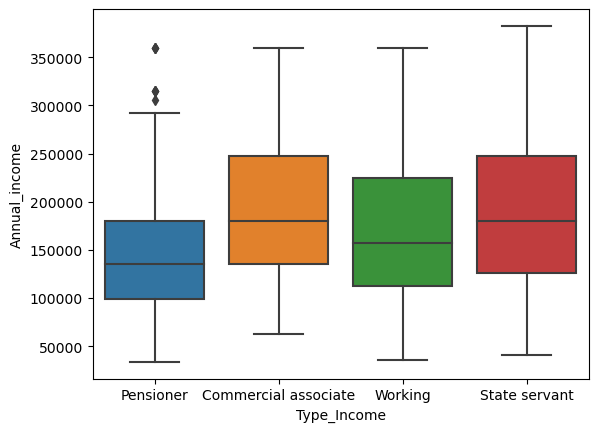

In [85]:
sns.boxplot(x = 'Type_Income', y = 'Annual_income', data = data)
plt.show()

#### State servant & commercial associate are earning more than Pensioner and working staffs.

In [88]:
# Let's see how many positive (0) and negative (1) samples we have in our dataframe
data['label'].value_counts()

0    1181
1     134
Name: label, dtype: int64

#### Since these two values are not equal, our target column can be considered imbalanced.

In [528]:
# Normalized value counts
data.label.value_counts(normalize=True)

0    0.898099
1    0.101901
Name: label, dtype: float64

#### We can plot the target column value counts by calling the plot() function and telling it what kind of plot we'd like, in this case, bar is good.

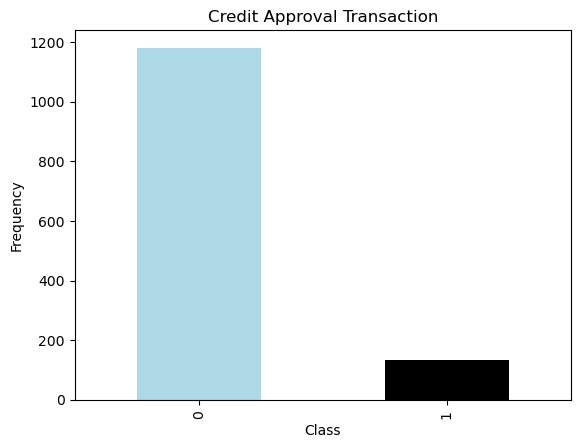

In [533]:
data.label.value_counts().plot(kind="bar", color=[ 'lightblue','k'])
plt.title('Credit Approval Transaction')
plt.xlabel('Class')
plt.ylabel('Frequency');

#### We can see that it is perfectly imbalanced data . The ratio of approved & rejected is 9:1

In [94]:
data.nunique() ## to see the unique values of column

Ind_ID             1315
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              5
Annual_income        91
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Age                1112
work_exp_years      801
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        6
label                 2
dtype: int64

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1315 non-null   int64  
 1   GENDER           1315 non-null   object 
 2   Car_Owner        1315 non-null   object 
 3   Propert_Owner    1315 non-null   object 
 4   CHILDREN         1315 non-null   int64  
 5   Annual_income    1315 non-null   float64
 6   Type_Income      1315 non-null   object 
 7   EDUCATION        1315 non-null   object 
 8   Marital_status   1315 non-null   object 
 9   Housing_type     1315 non-null   object 
 10  Age              1315 non-null   float64
 11  work_exp_years   1315 non-null   float64
 12  Mobile_phone     1315 non-null   int64  
 13  Work_Phone       1315 non-null   int64  
 14  Phone            1315 non-null   int64  
 15  EMAIL_ID         1315 non-null   int64  
 16  Type_Occupation  1315 non-null   object 
 17  Family_Members

## Hypothesis Testing

### Categorical Feature selection using Chi-square test of Independence

#### The chi-square test of independence is used to if there is a significant relationship between categoricals variable with respect to Target variable.

#### The chi-square test contains two hypothesis present. 1. Null Hypothesis(H0)  2. Alternate hypothesis (H1)

#### Null hypothesis (H0) : There is no realtionship between the variables
#### Alternate hypothesis (H1) :There is a realtionship between the variables

#### Just like statistical testing , we chose P value = 0.05 (with a 95% Confidence Interval)

#### if p value > 0.05 ; it means the test result will lie in acceptance region and we will accept the null hypothesis
#### if p value < 0.05 ; it means the test result will lie in rejection region and we will reject the null hypothesis and accept alternate hypothesis

In [96]:
df = data.copy() ## make a copy of original data

In [97]:
df

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0     5008827      M         Y             Y         0       180000.0   
1     5009744      F         Y             N         0       315000.0   
4     5009752      F         Y             N         0       315000.0   
6     5009754      F         Y             N         0       315000.0   
7     5009894      F         N             N         0       180000.0   
...       ...    ...       ...           ...       ...            ...   
1542  5118268      M         Y             N         1       360000.0   
1544  5023655      F         N             N         0       225000.0   
1545  5115992      M         Y             Y         2       180000.0   
1546  5118219      M         Y             N         0       270000.0   
1547  5053790      F         Y             Y         0       225000.0   

               Type_Income                      EDUCATION  \
0                Pensioner               Higher education   
1     Commercial associate               Higher education   
4     Commercial associate               Higher education   
6     Commercial associate               Higher education   
7                Pensioner  Secondary / secondary special   
...                    ...                            ...   
1542         State servant  Secondary / secondary special   
1544  Commercial associate              Incomplete higher   
1545               Working               Higher education   
1546               Working  Secondary / secondary special   
1547               Working               Higher education   

            Marital_status       Housing_type        Age  work_exp_years  \
0                  Married  House / apartment  51.430137        5.350685   
1                  Married  House / apartment  37.142466        1.605479   
4                  Married  House / apartment  37.142466        1.605479   
6                  Married  House / apartment  37.142466        1.605479   
7                  Married  House / apartment  60.641096        5.350685   
...                    ...                ...        ...             ...   
1542               Married  House / apartment  30.942466        9.687671   
1544  Single / not married  House / apartment  28.024658        3.312329   
1545               Married  House / apartment  36.093151        6.786301   
1546        Civil marriage  House / apartment  41.895890        1.767123   
1547               Married  House / apartment  45.482192        7.832877   

      Mobile_phone  Work_Phone  Phone  EMAIL_ID Type_Occupation  \
0                1           0      0         0        Laborers   
1                1           1      1         0        Laborers   
4                1           1      1         0        Laborers   
6                1           1      1         0        Laborers   
7                1           0      0         0        Laborers   
...            ...         ...    ...       ...             ...   
1542             1           0      1         0         Drivers   
1544             1           0      0         0     Accountants   
1545             1           0      0         0        Managers   
1546             1           1      1         0         Drivers   
1547             1           0      0         0        Laborers   

      Family_Members  label  
0                  2      1  
1                  2      1  
4                  2      1  
6                  2      1  
7                  2      1  
...              ...    ...  
1542               3      0  
1544               1      0  
1545               4      0  
1546               2      0  
1547               2      0  

[1315 rows x 19 columns]

In [98]:
df['Type_Income'].value_counts()

Working                 677
Commercial associate    304
Pensioner               250
State servant            84
Name: Type_Income, dtype: int64

In [99]:
df['Housing_type'].value_counts()

House / apartment      1170
With parents             72
Municipal apartment      45
Rented apartment         19
Office apartment          6
Co-op apartment           3
Name: Housing_type, dtype: int64

In [100]:
df.select_dtypes('object') ## to select the categorical columns

GENDER Car_Owner Propert_Owner           Type_Income  \
0         M         Y             Y             Pensioner   
1         F         Y             N  Commercial associate   
4         F         Y             N  Commercial associate   
6         F         Y             N  Commercial associate   
7         F         N             N             Pensioner   
...     ...       ...           ...                   ...   
1542      M         Y             N         State servant   
1544      F         N             N  Commercial associate   
1545      M         Y             Y               Working   
1546      M         Y             N               Working   
1547      F         Y             Y               Working   

                          EDUCATION        Marital_status       Housing_type  \
0                  Higher education               Married  House / apartment   
1                  Higher education               Married  House / apartment   
4                  Higher education               Married  House / apartment   
6                  Higher education               Married  House / apartment   
7     Secondary / secondary special               Married  House / apartment   
...                             ...                   ...                ...   
1542  Secondary / secondary special               Married  House / apartment   
1544              Incomplete higher  Single / not married  House / apartment   
1545               Higher education               Married  House / apartment   
1546  Secondary / secondary special        Civil marriage  House / apartment   
1547               Higher education               Married  House / apartment   

     Type_Occupation  
0           Laborers  
1           Laborers  
4           Laborers  
6           Laborers  
7           Laborers  
...              ...  
1542         Drivers  
1544     Accountants  
1545        Managers  
1546         Drivers  
1547        Laborers  

[1315 rows x 8 columns]

## Feature Encoding 

### Apply dummy encoding on nominal features

In [102]:
dummy_data = pd.get_dummies(data[['GENDER','Car_Owner','Propert_Owner','Marital_status','Housing_type']],drop_first = True)

In [103]:
dummy_data

GENDER_M  Car_Owner_Y  Propert_Owner_Y  Marital_status_Married  \
0            1            1                1                       1   
1            0            1                0                       1   
4            0            1                0                       1   
6            0            1                0                       1   
7            0            0                0                       1   
...        ...          ...              ...                     ...   
1542         1            1                0                       1   
1544         0            0                0                       0   
1545         1            1                1                       1   
1546         1            1                0                       0   
1547         0            1                1                       1   

      Marital_status_Separated  Marital_status_Single / not married  \
0                            0                                    0   
1                            0                                    0   
4                            0                                    0   
6                            0                                    0   
7                            0                                    0   
...                        ...                                  ...   
1542                         0                                    0   
1544                         0                                    1   
1545                         0                                    0   
1546                         0                                    0   
1547                         0                                    0   

      Marital_status_Widow  Housing_type_House / apartment  \
0                        0                               1   
1                        0                               1   
4                        0                               1   
6                        0                               1   
7                        0                               1   
...                    ...                             ...   
1542                     0                               1   
1544                     0                               1   
1545                     0                               1   
1546                     0                               1   
1547                     0                               1   

      Housing_type_Municipal apartment  Housing_type_Office apartment  \
0                                    0                              0   
1                                    0                              0   
4                                    0                              0   
6                                    0                              0   
7                                    0                              0   
...                                ...                            ...   
1542                                 0                              0   
1544                                 0                              0   
1545                                 0                              0   
1546                                 0                              0   
1547                                 0                              0   

      Housing_type_Rented apartment  Housing_type_With parents  
0                                 0                          0  
1                                 0                          0  
4                                 0                          0  
6                                 0                          0  
7                                 0                          0  
...                             ...                        ...  
1542                              0                          0  
1544                              0                          0  
1545                              0                          0  
1546            

#### Apply ordinal encoding on ordinal features
#### There are three ordinal features 
#### 1.Type_income 2. Educaion 3. Type_occupation


In [105]:
from sklearn.preprocessing import OrdinalEncoder

In [106]:
OE = OrdinalEncoder()

In [107]:
OE.fit_transform(df[['Type_Income']])

array([[1.],
       [0.],
       [0.],
       ...,
       [3.],
       [3.],
       [3.]])

In [108]:
df['Type_Income']=OE.fit_transform(df[['Type_Income']])

In [109]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
4  5009752      F         Y             N         0       315000.0   
6  5009754      F         Y             N         0       315000.0   
7  5009894      F         N             N         0       180000.0   

   Type_Income                      EDUCATION Marital_status  \
0          1.0               Higher education        Married   
1          0.0               Higher education        Married   
4          0.0               Higher education        Married   
6          0.0               Higher education        Married   
7          1.0  Secondary / secondary special        Married   

        Housing_type        Age  work_exp_years  Mobile_phone  Work_Phone  \
0  House / apartment  51.430137        5.350685             1           0   
1  House / apartment  37.142466        1.605479             1           1   
4  House / apartment  37.142466        1.605479             1           1   
6  House / apartment  37.142466        1.605479             1           1   
7  House / apartment  60.641096        5.350685             1           0   

   Phone  EMAIL_ID Type_Occupation  Family_Members  label  
0      0         0        Laborers               2      1  
1      1         0        Laborers               2      1  
4      1         0        Laborers               2      1  
6      1         0        Laborers               2      1  
7      0         0        Laborers               2      1

In [110]:
df['EDUCATION']=OE.fit_transform(df[['EDUCATION']])

In [111]:
df['Type_Occupation']=OE.fit_transform(df[['Type_Occupation']])

In [112]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
4  5009752      F         Y             N         0       315000.0   
6  5009754      F         Y             N         0       315000.0   
7  5009894      F         N             N         0       180000.0   

   Type_Income  EDUCATION Marital_status       Housing_type        Age  \
0          1.0        1.0        Married  House / apartment  51.430137   
1          0.0        1.0        Married  House / apartment  37.142466   
4          0.0        1.0        Married  House / apartment  37.142466   
6          0.0        1.0        Married  House / apartment  37.142466   
7          1.0        4.0        Married  House / apartment  60.641096   

   work_exp_years  Mobile_phone  Work_Phone  Phone  EMAIL_ID  Type_Occupation  \
0        5.350685             1           0      0         0              8.0   
1        1.605479             1           1      1         0              8.0   
4        1.605479             1           1      1         0              8.0   
6        1.605479             1           1      1         0              8.0   
7        5.350685             1           0      0         0              8.0   

   Family_Members  label  
0               2      1  
1               2      1  
4               2      1  
6               2      1  
7               2      1

#### Now we have to conactenate the two datasets

In [114]:
df_fin = pd.concat([df,dummy_data],axis=1)

In [115]:
df_fin.columns ### These are all the columns after encoding

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'work_exp_years', 'Mobile_phone', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members', 'label',
       'GENDER_M', 'Car_Owner_Y', 'Propert_Owner_Y', 'Marital_status_Married',
       'Marital_status_Separated', 'Marital_status_Single / not married',
       'Marital_status_Widow', 'Housing_type_House / apartment',
       'Housing_type_Municipal apartment', 'Housing_type_Office apartment',
       'Housing_type_Rented apartment', 'Housing_type_With parents'],
      dtype='object')

#### After dummy encoding main columns have to be removed

In [116]:
df_fin.drop(columns=['GENDER','Car_Owner','Propert_Owner','Marital_status','Housing_type'],axis=1,inplace=True)

In [117]:
df_fin

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION        Age  \
0     5008827         0       180000.0          1.0        1.0  51.430137   
1     5009744         0       315000.0          0.0        1.0  37.142466   
4     5009752         0       315000.0          0.0        1.0  37.142466   
6     5009754         0       315000.0          0.0        1.0  37.142466   
7     5009894         0       180000.0          1.0        4.0  60.641096   
...       ...       ...            ...          ...        ...        ...   
1542  5118268         1       360000.0          2.0        4.0  30.942466   
1544  5023655         0       225000.0          0.0        2.0  28.024658   
1545  5115992         2       180000.0          3.0        1.0  36.093151   
1546  5118219         0       270000.0          3.0        4.0  41.895890   
1547  5053790         0       225000.0          3.0        1.0  45.482192   

      work_exp_years  Mobile_phone  Work_Phone  Phone  ...  Propert_Owner_Y  \
0           5.350685             1           0      0  ...                1   
1           1.605479             1           1      1  ...                0   
4           1.605479             1           1      1  ...                0   
6           1.605479             1           1      1  ...                0   
7           5.350685             1           0      0  ...                0   
...              ...           ...         ...    ...  ...              ...   
1542        9.687671             1           0      1  ...                0   
1544        3.312329             1           0      0  ...                0   
1545        6.786301             1           0      0  ...                1   
1546        1.767123             1           1      1  ...                0   
1547        7.832877             1           0      0  ...                1   

      Marital_status_Married  Marital_status_Separated  \
0                          1                         0   
1                          1                         0   
4                          1                         0   
6                          1                         0   
7                          1                         0   
...                      ...                       ...   
1542                       1                         0   
1544                       0                         0   
1545                       1                         0   
1546                       0                         0   
1547                       1                         0   

      Marital_status_Single / not married  Marital_status_Widow  \
0                                       0                     0   
1                                       0                     0   
4                                       0                     0   
6                                       0                     0   
7                                       0                     0   
...                                   ...                   ...   
1542                                    0                     0   
1544                                    1                     0   
1545                                    0                     0   
1546                                    0                     0   
1547                                    0                     0   

      Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                                  1                                 0   
1                                  1                                 0   
4                                  1                                 0   
6                                  1                                 0   
7                                  1                                 0   
...                              ...                               ...   
1542                               1                                 0   
1544                               1   

In [118]:
from sklearn.feature_selection import chi2

In [119]:
df_fin.info() ## we can see that all columns have been converted to numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1547
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Ind_ID                               1315 non-null   int64  
 1   CHILDREN                             1315 non-null   int64  
 2   Annual_income                        1315 non-null   float64
 3   Type_Income                          1315 non-null   float64
 4   EDUCATION                            1315 non-null   float64
 5   Age                                  1315 non-null   float64
 6   work_exp_years                       1315 non-null   float64
 7   Mobile_phone                         1315 non-null   int64  
 8   Work_Phone                           1315 non-null   int64  
 9   Phone                                1315 non-null   int64  
 10  EMAIL_ID                             1315 non-null   int64  
 11  Type_Occupation               

In [120]:
df_chi2 = df_fin.drop(columns=['Ind_ID','Annual_income','Age','work_exp_years','Family_Members']) ## Select categorical columns
                                                                                                  ## for chi2 test

In [121]:
df_chi2

CHILDREN  Type_Income  EDUCATION  Mobile_phone  Work_Phone  Phone  \
0            0          1.0        1.0             1           0      0   
1            0          0.0        1.0             1           1      1   
4            0          0.0        1.0             1           1      1   
6            0          0.0        1.0             1           1      1   
7            0          1.0        4.0             1           0      0   
...        ...          ...        ...           ...         ...    ...   
1542         1          2.0        4.0             1           0      1   
1544         0          0.0        2.0             1           0      0   
1545         2          3.0        1.0             1           0      0   
1546         0          3.0        4.0             1           1      1   
1547         0          3.0        1.0             1           0      0   

      EMAIL_ID  Type_Occupation  label  GENDER_M  ...  Propert_Owner_Y  \
0            0              8.0      1         1  ...                1   
1            0              8.0      1         0  ...                0   
4            0              8.0      1         0  ...                0   
6            0              8.0      1         0  ...                0   
7            0              8.0      1         0  ...                0   
...        ...              ...    ...       ...  ...              ...   
1542         0              4.0      0         1  ...                0   
1544         0              0.0      0         0  ...                0   
1545         0             10.0      0         1  ...                1   
1546         0              4.0      0         1  ...                0   
1547         0              8.0      0         0  ...                1   

      Marital_status_Married  Marital_status_Separated  \
0                          1                         0   
1                          1                         0   
4                          1                         0   
6                          1                         0   
7                          1                         0   
...                      ...                       ...   
1542                       1                         0   
1544                       0                         0   
1545                       1                         0   
1546                       0                         0   
1547                       1                         0   

      Marital_status_Single / not married  Marital_status_Widow  \
0                                       0                     0   
1                                       0                     0   
4                                       0                     0   
6                                       0                     0   
7                                       0                     0   
...                                   ...                   ...   
1542                                    0                     0   
1544                                    1                     0   
1545                                    0                     0   
1546                                    0                     0   
1547                                    0                     0   

      Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                                  1                                 0   
1                                  1                                 0   
4                                  1                                 0   
6                                  1                                 0   
7                                  1                                 0   
...                              ...                               ...   
1542                               1                                 0   
1544                               1                                 0   
1545                               1            

In [122]:
x = df_chi2.drop('label',axis=1)

In [123]:
y = df['label']

In [124]:
f_p_value = chi2(x,y) ## Returns two value 1. Fscore 2. p value

In [125]:
f_p_value

(array([6.68548364e+00, 1.88530120e+00, 2.82731008e-02, 0.00000000e+00,
        3.96218851e-01, 3.14629247e-01, 3.12201947e-01, 6.06530326e-01,
        9.36287057e-01, 4.07308765e-01, 2.77324911e-03, 2.93617810e-01,
        1.41131075e+00, 2.31987958e+00, 6.67337880e-02, 6.31702346e-01,
        9.99086209e+00, 3.51152367e+00, 2.44969147e+00, 1.68984179e+00]),
 array([0.00972011, 0.16973285, 0.86646837, 1.        , 0.52904849,
        0.57485329, 0.57633212, 0.4360972 , 0.33323455, 0.52333864,
        0.9580015 , 0.58791143, 0.23483892, 0.12772991, 0.79615313,
        0.42673157, 0.00157319, 0.06094338, 0.11754797, 0.19362183]))

####  To see the scores in a visualise format

In [126]:
feature_scores = pd.DataFrame({'F_score':f_p_value[0],'p_values':f_p_value[1]},index = x.columns)

In [127]:
feature_scores.sort_values(by='p_values', ascending=True)

F_score  p_values
Housing_type_Municipal apartment     9.990862  0.001573
CHILDREN                             6.685484  0.009720
Housing_type_Office apartment        3.511524  0.060943
Housing_type_Rented apartment        2.449691  0.117548
Marital_status_Single / not married  2.319880  0.127730
Type_Income                          1.885301  0.169733
Housing_type_With parents            1.689842  0.193622
Marital_status_Separated             1.411311  0.234839
GENDER_M                             0.936287  0.333235
Housing_type_House / apartment       0.631702  0.426732
Type_Occupation                      0.606530  0.436097
Car_Owner_Y                          0.407309  0.523339
Work_Phone                           0.396219  0.529048
Phone                                0.314629  0.574853
EMAIL_ID                             0.312202  0.576332
Marital_status_Married               0.293618  0.587911
Marital_status_Widow                 0.066734  0.796153
EDUCATION                            0.028273  0.866468
Propert_Owner_Y                      0.002773  0.958001
Mobile_phone                         0.000000  1.000000

#### Higher  the P value lesser the importance of features are. We can remove the two featues which are least important to our model.

In [128]:
df_fin.drop(columns=['Mobile_phone','Propert_Owner_Y'],inplace =True)

In [129]:
df_fin 

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION        Age  \
0     5008827         0       180000.0          1.0        1.0  51.430137   
1     5009744         0       315000.0          0.0        1.0  37.142466   
4     5009752         0       315000.0          0.0        1.0  37.142466   
6     5009754         0       315000.0          0.0        1.0  37.142466   
7     5009894         0       180000.0          1.0        4.0  60.641096   
...       ...       ...            ...          ...        ...        ...   
1542  5118268         1       360000.0          2.0        4.0  30.942466   
1544  5023655         0       225000.0          0.0        2.0  28.024658   
1545  5115992         2       180000.0          3.0        1.0  36.093151   
1546  5118219         0       270000.0          3.0        4.0  41.895890   
1547  5053790         0       225000.0          3.0        1.0  45.482192   

      work_exp_years  Work_Phone  Phone  EMAIL_ID  ...  Car_Owner_Y  \
0           5.350685           0      0         0  ...            1   
1           1.605479           1      1         0  ...            1   
4           1.605479           1      1         0  ...            1   
6           1.605479           1      1         0  ...            1   
7           5.350685           0      0         0  ...            0   
...              ...         ...    ...       ...  ...          ...   
1542        9.687671           0      1         0  ...            1   
1544        3.312329           0      0         0  ...            0   
1545        6.786301           0      0         0  ...            1   
1546        1.767123           1      1         0  ...            1   
1547        7.832877           0      0         0  ...            1   

      Marital_status_Married  Marital_status_Separated  \
0                          1                         0   
1                          1                         0   
4                          1                         0   
6                          1                         0   
7                          1                         0   
...                      ...                       ...   
1542                       1                         0   
1544                       0                         0   
1545                       1                         0   
1546                       0                         0   
1547                       1                         0   

      Marital_status_Single / not married  Marital_status_Widow  \
0                                       0                     0   
1                                       0                     0   
4                                       0                     0   
6                                       0                     0   
7                                       0                     0   
...                                   ...                   ...   
1542                                    0                     0   
1544                                    1                     0   
1545                                    0                     0   
1546                                    0                     0   
1547                                    0                     0   

      Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                                  1                                 0   
1                                  1                                 0   
4                                  1                                 0   
6                                  1                                 0   
7                                  1                                 0   
...                              ...                               ...   
1542                               1                                 0   
1544                               1                                 0   
1545                               1                         

### Feature selection using correlation for numerical columns

In [130]:
num_col = df_fin[['Annual_income','Age','work_exp_years','Family_Members']]

In [131]:
num_col.corr()

Annual_income       Age  work_exp_years  Family_Members
Annual_income        1.000000 -0.114270        0.090056        0.059224
Age                 -0.114270  1.000000        0.102264       -0.273596
work_exp_years       0.090056  0.102264        1.000000        0.053713
Family_Members       0.059224 -0.273596        0.053713        1.000000

#### To see in visualise format we use heatmap :

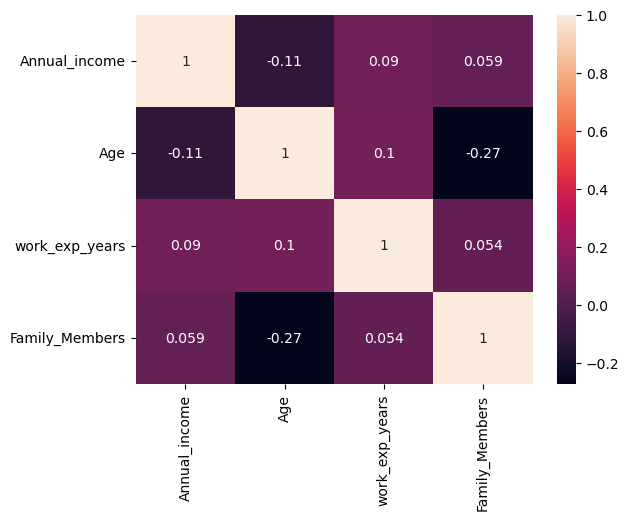

In [133]:
corr= num_col.corr()
sns.heatmap(corr,annot=True)
plt.show()

####  There is no such numerical columns which are highly correlated with each other.

## Fixing Imbalanced dataset

Text(0, 0.5, 'Frequency')

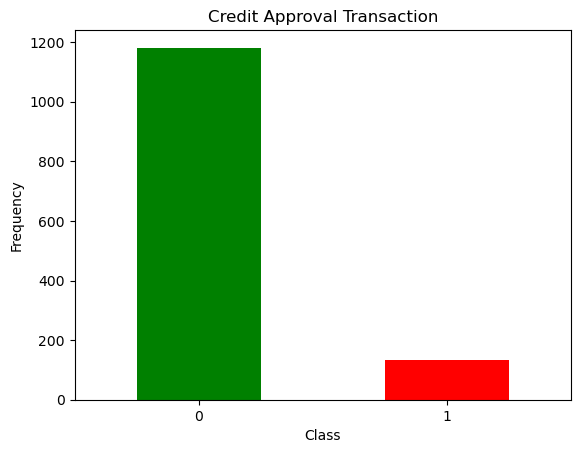

In [135]:
classes=pd.value_counts(df_fin['label'],sort=True)
classes.plot(kind='bar',color =['green','red'],rot=0)
plt.title('Credit Approval Transaction')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [136]:
df_fin['label'].value_counts()

0    1181
1     134
Name: label, dtype: int64

In [137]:
Approved = df_fin[df_fin['label']==0]
Rejected = df_fin[df_fin['label']==1]

In [138]:
print(Approved.shape,Rejected.shape)

(1181, 24) (134, 24)


### Content

#### We can clearly see that it is a perfect example of imbalanced data. The datset contains information about bank customers. The datset presents two part , out of 134 customers are not creditworthy out of 1315 customers and 1184 are good customers. There is a ratio of approx 9:1 

### Handing inbalanced data using Oversampling 

#### Since our data is not too large having only 1.3k rows so we use oversampling technique . This is one   of the efficient process in sampling . here we will not loose any information as we are not using under sampling method. in this process it will create some more more data ponits to handle this data and try to make the ratio approx 1:1

In [139]:
from imblearn.combine import SMOTETomek ## importing necessary libraries

####  Create Independent and dependent features:

In [141]:
columns = df_fin.columns.tolist()

#### Filter the dependent and independent column 

In [143]:
columns = [c for c in columns if c not in ['label']]

In [144]:
X = df_fin[columns]

In [145]:
X.head() ## Independent Data

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION        Age  \
0  5008827         0       180000.0          1.0        1.0  51.430137   
1  5009744         0       315000.0          0.0        1.0  37.142466   
4  5009752         0       315000.0          0.0        1.0  37.142466   
6  5009754         0       315000.0          0.0        1.0  37.142466   
7  5009894         0       180000.0          1.0        4.0  60.641096   

   work_exp_years  Work_Phone  Phone  EMAIL_ID  ...  Car_Owner_Y  \
0        5.350685           0      0         0  ...            1   
1        1.605479           1      1         0  ...            1   
4        1.605479           1      1         0  ...            1   
6        1.605479           1      1         0  ...            1   
7        5.350685           0      0         0  ...            0   

   Marital_status_Married  Marital_status_Separated  \
0                       1                         0   
1                       1                         0   
4                       1                         0   
6                       1                         0   
7                       1                         0   

   Marital_status_Single / not married  Marital_status_Widow  \
0                                    0                     0   
1                                    0                     0   
4                                    0                     0   
6                                    0                     0   
7                                    0                     0   

   Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                               1                                 0   
1                               1                                 0   
4                               1                                 0   
6                               1                                 0   
7                               1                                 0   

   Housing_type_Office apartment  Housing_type_Rented apartment  \
0                              0                              0   
1                              0                              0   
4                              0                              0   
6                              0                              0   
7                              0                              0   

   Housing_type_With parents  
0                          0  
1                          0  
4                          0  
6                          0  
7                          0  

[5 rows x 23 columns]

In [146]:
Y = df_fin['label'] ## Output data

#### Implementing oversampling for handling imbalanced

In [148]:
smk = SMOTETomek(random_state=42)

In [149]:
X_res,Y_res=smk.fit_resample(X,Y)

In [150]:
print(X_res.shape,Y_res.shape)

(2156, 23) (2156,)


### To compare the y dependent features value counts

In [151]:
from collections import Counter

In [152]:
print('Original dataset shape{}'.format(Counter(Y)))
print('Resampled dataset shape{}'.format(Counter(Y_res)))

Original dataset shapeCounter({0: 1181, 1: 134})
Resampled dataset shapeCounter({1: 1078, 0: 1078})


Text(0, 0.5, 'Frequency')

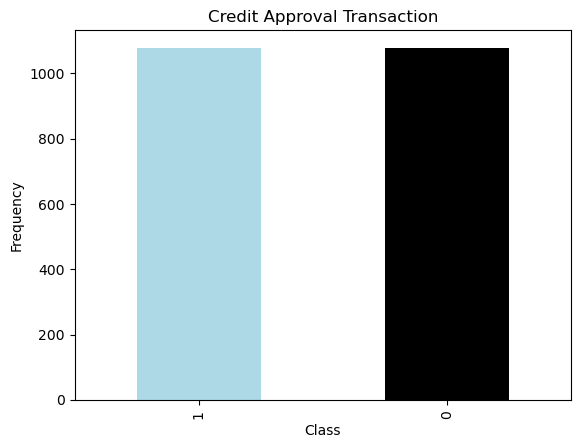

In [534]:
Y_res.value_counts().plot(kind="bar", color=[ 'lightblue','k'])
plt.title('Credit Approval Transaction')
plt.xlabel('Class')
plt.ylabel('Frequency')

###  Now the data has become balanced and we can procced futher.

In [155]:
df_fin = pd.concat([X_res,Y_res],axis=1) ## to conactenate the input & output data

In [156]:
df_fin

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION        Age  \
0     5008827         0  180000.000000     1.000000   1.000000  51.430137   
1     5009744         0  315000.000000     0.000000   1.000000  37.142466   
2     5009752         0  315000.000000     0.000000   1.000000  37.142466   
3     5009754         0  315000.000000     0.000000   1.000000  37.142466   
4     5018498         0   90000.000000     3.000000   4.000000  51.917808   
...       ...       ...            ...          ...        ...        ...   
2151  5060807         0  135000.000000     1.326560   4.000000  32.378086   
2152  5009019         0  180000.000000     1.000000   1.541784  53.093586   
2153  5135345         0  112500.000000     0.000000   1.000000  55.076712   
2154  5091513         0  110701.346232     0.679940   4.000000  52.374028   
2155  5149837         0  157500.000000     0.753187   1.000000  33.936986   

      work_exp_years  Work_Phone  Phone  EMAIL_ID  ...  \
0           5.350685           0      0         0  ...   
1           1.605479           1      1         0  ...   
2           1.605479           1      1         0  ...   
3           1.605479           1      1         0  ...   
4           2.745205           1      1         0  ...   
...              ...         ...    ...       ...  ...   
2151        4.985919           0      0         0  ...   
2152        5.350685           0      0         0  ...   
2153        1.520548           0      0         0  ...   
2154        5.483970           0      0         0  ...   
2155        3.630137           0      1         1  ...   

      Marital_status_Married  Marital_status_Separated  \
0                          1                         0   
1                          1                         0   
2                          1                         0   
3                          1                         0   
4                          1                         0   
...                      ...                       ...   
2151                       1                         0   
2152                       1                         0   
2153                       1                         0   
2154                       0                         0   
2155                       1                         0   

      Marital_status_Single / not married  Marital_status_Widow  \
0                                       0                     0   
1                                       0                     0   
2                                       0                     0   
3                                       0                     0   
4                                       0                     0   
...                                   ...                   ...   
2151                                    0                     0   
2152                                    0                     0   
2153                                    0                     0   
2154                                    0                     0   
2155                                    0                     0   

      Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                                  1                                 0   
1                                  1                                 0   
2                                  1                                 0   
3                                  1                                 0   
4                                  1                                 0   
...                              ...                               ...   
2151                               1                                 0   
2152                               1                                 0   
2153                               1                                 0   
2154                               1                                 0   
2155                               1                                 

## Pair plot

### To see the relationship between all numerical columns and also it will help us to choose the model.

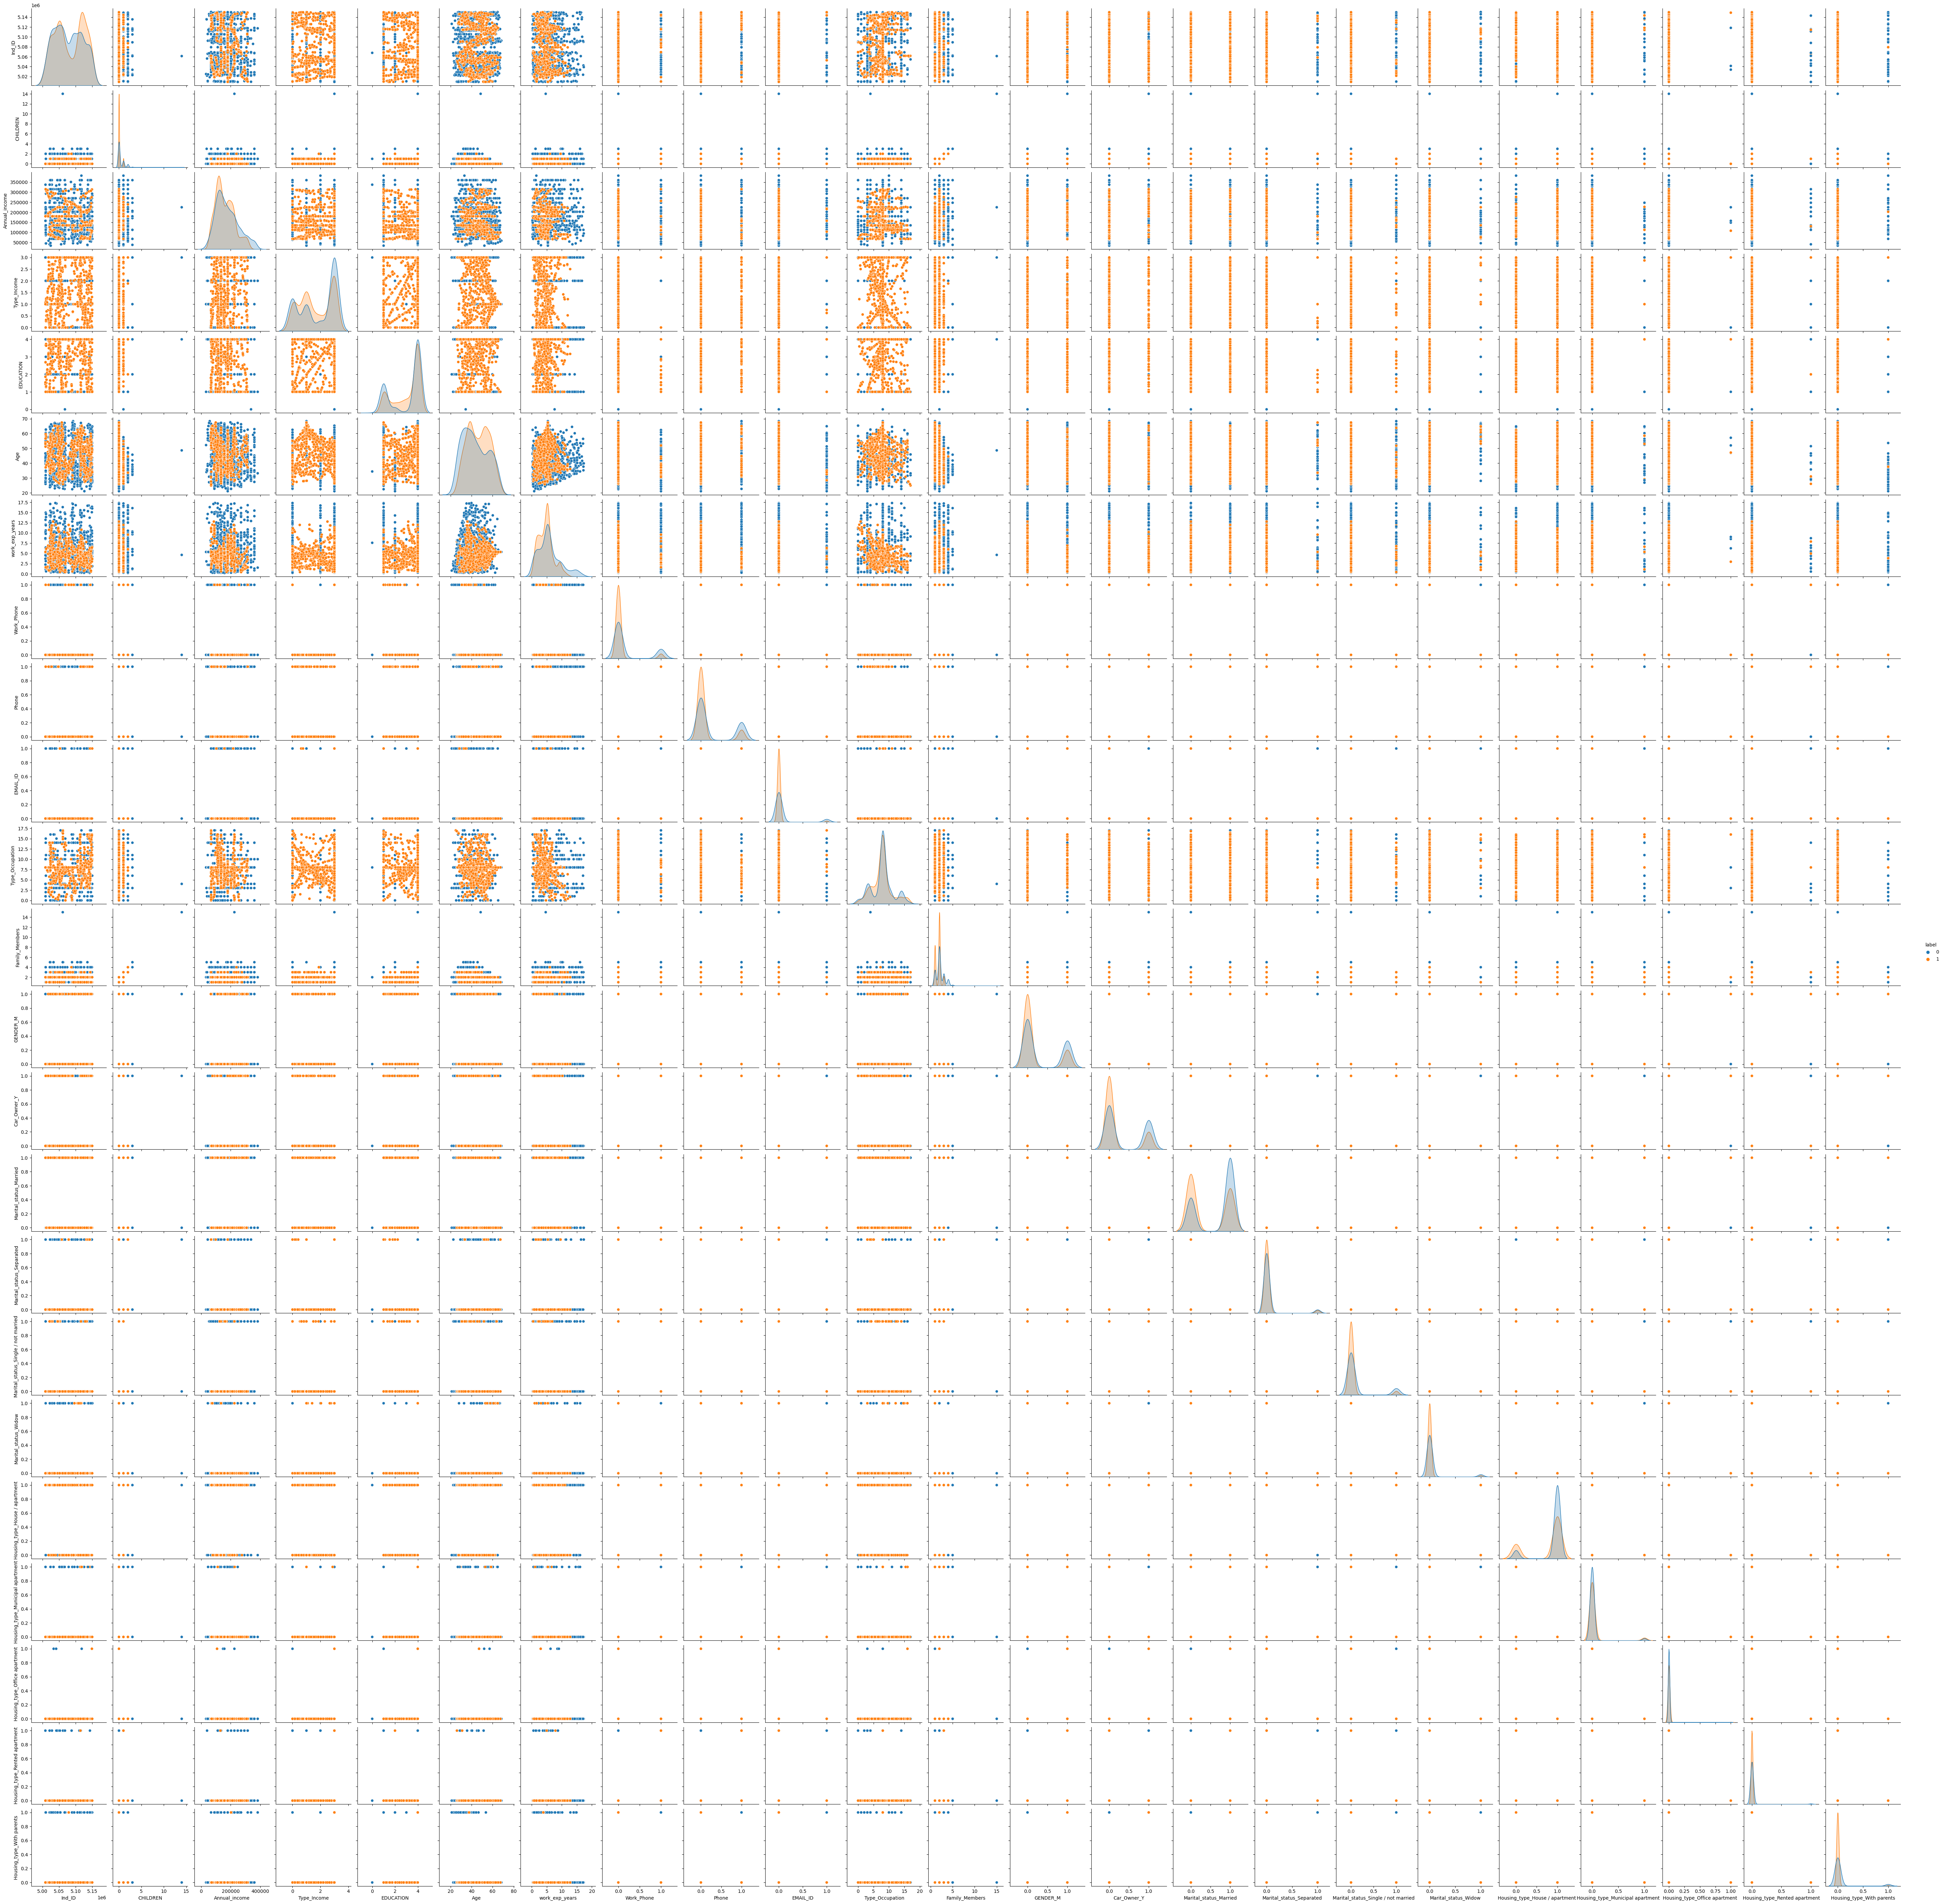

In [158]:
sns.pairplot(df_fin,hue='label')

### We can see that the points are overlapping so those are not linearly seperable . I should use non linear advanced classification model ex - Decision Tree , Random Forest , KNN to solve this problem 

## Splitting the data into Training and Test data

In [160]:
X_res

Ind_ID  CHILDREN  Annual_income  Type_Income  EDUCATION        Age  \
0     5008827         0  180000.000000     1.000000   1.000000  51.430137   
1     5009744         0  315000.000000     0.000000   1.000000  37.142466   
2     5009752         0  315000.000000     0.000000   1.000000  37.142466   
3     5009754         0  315000.000000     0.000000   1.000000  37.142466   
4     5018498         0   90000.000000     3.000000   4.000000  51.917808   
...       ...       ...            ...          ...        ...        ...   
2151  5060807         0  135000.000000     1.326560   4.000000  32.378086   
2152  5009019         0  180000.000000     1.000000   1.541784  53.093586   
2153  5135345         0  112500.000000     0.000000   1.000000  55.076712   
2154  5091513         0  110701.346232     0.679940   4.000000  52.374028   
2155  5149837         0  157500.000000     0.753187   1.000000  33.936986   

      work_exp_years  Work_Phone  Phone  EMAIL_ID  ...  Car_Owner_Y  \
0           5.350685           0      0         0  ...            1   
1           1.605479           1      1         0  ...            1   
2           1.605479           1      1         0  ...            1   
3           1.605479           1      1         0  ...            1   
4           2.745205           1      1         0  ...            1   
...              ...         ...    ...       ...  ...          ...   
2151        4.985919           0      0         0  ...            1   
2152        5.350685           0      0         0  ...            0   
2153        1.520548           0      0         0  ...            0   
2154        5.483970           0      0         0  ...            0   
2155        3.630137           0      1         1  ...            0   

      Marital_status_Married  Marital_status_Separated  \
0                          1                         0   
1                          1                         0   
2                          1                         0   
3                          1                         0   
4                          1                         0   
...                      ...                       ...   
2151                       1                         0   
2152                       1                         0   
2153                       1                         0   
2154                       0                         0   
2155                       1                         0   

      Marital_status_Single / not married  Marital_status_Widow  \
0                                       0                     0   
1                                       0                     0   
2                                       0                     0   
3                                       0                     0   
4                                       0                     0   
...                                   ...                   ...   
2151                                    0                     0   
2152                                    0                     0   
2153                                    0                     0   
2154                                    0                     0   
2155                                    0                     0   

      Housing_type_House / apartment  Housing_type_Municipal apartment  \
0                                  1                                 0   
1                                  1                                 0   
2                                  1                                 0   
3                                  1                                 0   
4                                  1                                 0   
...                              ...                               ...   
2151                               1                                 0   
2152                               1                                 0   
2153                               1                         

In [161]:
Y_res

0       1
1       1
2       1
3       1
4       1
       ..
2151    1
2152    1
2153    1
2154    1
2155    1
Name: label, Length: 2156, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split     ## we take 15 % for test data and 85 % for training

X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size = 0.15,  random_state = 5) 

In [163]:
print(X_res.shape, X_train.shape ,Y_train.shape, X_test.shape) ## shape of test and train data

(2156, 23) (1832, 23) (1832,) (324, 23)


### Standardisation of the data

#### we use StandardScaler to bring down the columns in a similar scale of value

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()

In [166]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Training :
## 1. Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [169]:
y_pred = log_reg.predict(X_test)

In [173]:
accuracy_score(Y_test, y_pred)

0.8209876543209876

In [174]:
log_reg_score = log_reg.score(X_test,Y_test)

In [175]:
log_reg_score

0.8209876543209876

## 2. Decision Tree

In [176]:
from sklearn.tree import DecisionTreeClassifier

In [177]:
dec_tree = DecisionTreeClassifier(max_depth=14,max_features='sqrt')

In [178]:
dec_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14, max_features='sqrt')

In [179]:
y_pred_dt = dec_tree.predict(X_test)

In [180]:
accuracy_score(Y_test,y_pred_dt)

0.8796296296296297

### to check for overfitting we check the model by giving X_train values to predict

In [181]:
y_pred_train = dec_tree.predict(X_train)

In [182]:
accuracy_score(Y_train,y_pred_train)

0.986353711790393

In [183]:
## since this model is overfitting so that hyperparameter tuning should be used to avoid that and select best parameters.

In [184]:
dt_score = dec_tree.score(X_test,Y_test)

In [185]:
dt_score

0.8796296296296297

## 3. Random Forest

In [461]:
from sklearn.ensemble import RandomForestClassifier

In [462]:
r_f = RandomForestClassifier()

In [463]:
r_f.fit(X_train,Y_train)

RandomForestClassifier()

In [464]:
r_f_pred = r_f.predict(X_test)

In [465]:
rf_score = r_f.score(X_test,Y_test)

In [466]:
rf_score

0.9598765432098766

### But we need to check that the model is  overfitting or not

In [467]:
Y_tr_val = r_f.predict(X_train)

In [468]:
accuracy_score(Y_train,Y_tr_val)

1.0

#### We can clearly see that this model is overfitting so for that we have to tune this model with hyperparameters to control overfitting and get best accuracy

## 4. KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
knn = KNeighborsClassifier()

In [194]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [195]:
k_score = knn.score(X_test,Y_test)

In [196]:
k_score

0.8796296296296297

## Model Comparison

In [197]:
model_scores={'logistic reg':log_reg_score,'Decision Tree':dt_score,'Random Forest':rf_score,'KNN':k_score}

### Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

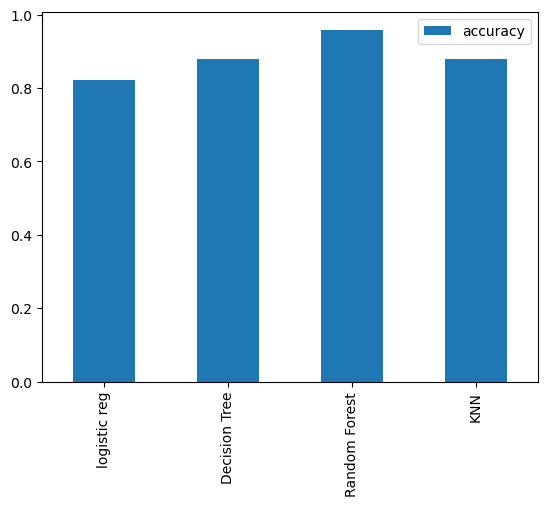

In [198]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

#### We can see from the graph that the Random Forest model performed best among these.
#### The accuracy score of random forest is approx 95 % which is quite impressive but we need to tune  the model to control overfitting.

#### Now let's see what could be done next:-

#### Hyperparameter tuning - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

#### Feature importance - If there are a large amount of features we're using to make predictions, do some have more importance than others? 

#### Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).

#### Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.

#### Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.

#### Recall - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.

#### F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.

#### Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

### Hyperparameter tuning and cross-validation

#### Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

In [199]:
# Create a list of train scores
train_scores = []

In [200]:
# Create a list of test scores
test_scores = []

In [201]:
# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

In [202]:
# Setup algorithm
knn = KNeighborsClassifier()

In [203]:
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    # Update the scores
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [204]:
train_scores

[1.0,
 0.9814410480349345,
 0.9432314410480349,
 0.9432314410480349,
 0.9055676855895196,
 0.9066593886462883,
 0.8804585152838428,
 0.8804585152838428,
 0.8629912663755459,
 0.8662663755458515,
 0.8526200873362445,
 0.8526200873362445,
 0.8384279475982532,
 0.8367903930131004,
 0.8258733624454149,
 0.8335152838427947,
 0.8236899563318777,
 0.8198689956331878,
 0.8155021834061136,
 0.8144104803493449]

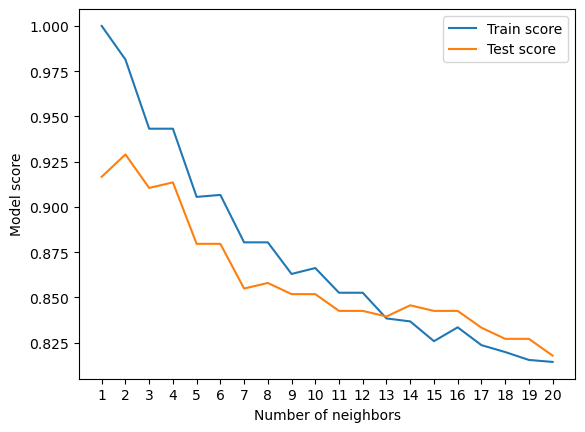

In [205]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

In [206]:
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN score on the test data: 92.90%


#### Looking at the graph, n_neighbors = 2 seems best.Even knowing this, the KNN's model performed better than  LogisticRegression and Decision Tree but not as good as  RandomForest did.

### Hyperparameter tuning for increase accuracy with RandomizedSearchCV

### Logistic Regression hyperparameters

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
parameters = {'penalty':['l1','l2','elasticnet'],'C': np.logspace(-4, 4, 20),'solver': ["liblinear"]}

In [209]:
classifier_reg = RandomizedSearchCV(log_reg,param_distributions=parameters,scoring='accuracy',cv=5,verbose=True)

In [210]:
classifier_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\papai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\papai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\papai\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\papai\anaconda3\Lib\site-packages\sklearn\linear_model\_lo

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['liblinear']},
                   scoring='accuracy', verbose=True)

In [211]:
classifier_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 545.5594781168514}

In [212]:
classifier_reg.score(X_test, Y_test)

0.8209876543209876

#### Tuning with hyperpramaters for logistic regression has no improvement of score(82%). It is same as before without tuning.

### Random Forest hyperparameters  to control the overfitting 

In [302]:
rf_para = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 15, 2)}

In [387]:
rf_class = RandomizedSearchCV(r_f,param_distributions=rf_para,scoring='accuracy',cv=5,verbose=True)

In [394]:
rf_class.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   scoring='accuracy', verbose=True)

In [395]:
rf_class.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [396]:
rf_class.score(X_test, Y_test)

0.9506172839506173

### to check overfitting

In [397]:
Y_Train_pred = rf_class.predict(X_train)

In [399]:
accuracy_score(Y_train,Y_Train_pred)

0.9759825327510917

#### we can see that the accuracy score of train data is not 1.0 so we can conclude that our model is not overfitting.

#### Tuning the model with best parameters found from RandomizedSearchCV

In [494]:
r_f_random = RandomForestClassifier(min_samples_split= 10,min_samples_leaf= 1,max_depth=10,n_estimators = 60)

In [499]:
r_f_random.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=60)

In [500]:
rfpredict = r_f_random.predict(X_test)

In [501]:
rfscore = r_f_random.score(X_test,Y_test)

In [502]:
rfscore

0.9567901234567902

#### Tuning with hyperpramaters for Random forest has slight improvement of score approx (95%). Random forest has given highest accuracy score among all of the models.

## Evaluating a classification model

In [470]:
y_predict = rf_class.predict(X_test)

In [471]:
y_predict

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

#### They look like our original test data labels, but different where the model has predicred wrong.

In [472]:
Y_test

1907    1
1654    1
708     0
1173    0
1701    1
       ..
1792    1
1620    1
433     0
824     0
1153    0
Name: label, Length: 324, dtype: int64

### Confusion matrix

#### A confusion matrix is a visual way to show where  model made the right predictions and where it made the wrong predictions.

In [473]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [474]:
print(confusion_matrix(Y_test, y_predict))

[[159   8]
 [  8 149]]


###  Visualising in a better way

In [475]:
cm = confusion_matrix(Y_test, y_predict,labels = rf_class.classes_)

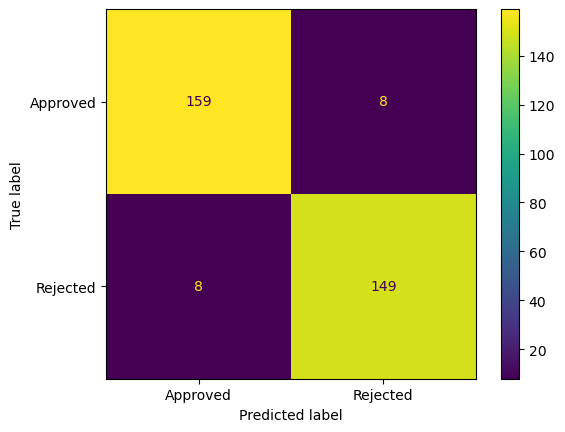

In [476]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=['Approved','Rejected'])
cm_disp.plot()

### Classification report

In [477]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       167
           1       0.95      0.95      0.95       157

    accuracy                           0.95       324
   macro avg       0.95      0.95      0.95       324
weighted avg       0.95      0.95      0.95       324



### Best hyperparameters for Random Forest model :

In [478]:
rf_class.best_params_

{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10}

### K fold cross validation

In [503]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [523]:
kfold = KFold(14)

In [524]:
results = cross_val_score(r_f_random,X_res,Y_res,cv=kfold)
print(results)
print(np.mean(results))

[0.66883117 0.94805195 0.96753247 0.92207792 0.92207792 0.95454545
 0.92857143 0.96753247 0.96753247 0.93506494 0.94155844 0.95454545
 0.97402597 0.96753247]
0.9299628942486086


#### The best accuracy we got from cross validation is 93 % and from hyperparameter tuning is around 95% , so we chose Random Forest classifier over all of the models.

### Feature importance

#### Since we're using Random Forest Classifier, we'll look at one way we can calculate feature importance for it.

#### To do so, we'll use the coef_ attribute. the coef_ attribute is the coefficient of the features in the decision function.

In [516]:
r_f_random.feature_importances_

array([0.09731907, 0.02843513, 0.0802261 , 0.08616369, 0.07615891,
       0.08966794, 0.10902073, 0.02901764, 0.02659929, 0.01244562,
       0.07194758, 0.04547586, 0.0185979 , 0.04239487, 0.05520422,
       0.01593217, 0.03787102, 0.01814458, 0.03685571, 0.00321747,
       0.00051337, 0.00424384, 0.01454729])

#### Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of customer application data leans more towards having creditworthy or not.

In [517]:
# Match features to columns
feature_val = pd.DataFrame({'coef':r_f_random.feature_importances_},index = X_res.columns)

In [518]:
feature_val.sort_values(by = 'coef',ascending = False)

coef
work_exp_years                       0.109021
Ind_ID                               0.097319
Age                                  0.089668
Type_Income                          0.086164
Annual_income                        0.080226
EDUCATION                            0.076159
Type_Occupation                      0.071948
Marital_status_Married               0.055204
Family_Members                       0.045476
Car_Owner_Y                          0.042395
Marital_status_Single / not married  0.037871
Housing_type_House / apartment       0.036856
Work_Phone                           0.029018
CHILDREN                             0.028435
Phone                                0.026599
GENDER_M                             0.018598
Marital_status_Widow                 0.018145
Marital_status_Separated             0.015932
Housing_type_With parents            0.014547
EMAIL_ID                             0.012446
Housing_type_Rented apartment        0.004244
Housing_type_Municipal apartment     0.003217
Housing_type_Office apartment        0.000513

#### The larger the value , the more the feature contributes to the models decision.

### Model insights:

#### If Random forest is used to classify our model we can say work_experience , annual_income ,age,occupation,type_income and education are the most top five important features to predict credit approval for customers.

### Summary

#### In this project, I have tried to find out the factors that are most important for getting an approval for the credit card through the power of Data Analysis and Machine learning. Though I have achieved 95% of accuracy, I also try to collect more data to increase performance of the model. However, 95% is the best we could get from this data using both the model and Random forest.

### Report 

#### Since the objective of this problem is to minimize the risk of credit default for the financial institution, the metrics to use depends on the current economical situation:

#### During the time of a bull market (when the economy is expending), people feel wealthy and usually are employed. Money is usually cheap and the risk of default is low. The financial institution is able to handle the risk of default therefore is not very strict on giving out credit. The financial institution can handle a number of bad clients as long as the vast majority of applicants are good clients .In this case, having a good recall (sensitivity) is ideal.

#### During a bear market (when the economy is contracting), people loose their jobs and their money through the stock market. Many people struggle to meet their financial obligations. The financial institution therefore tend to be more conservative on giving out credit or loans. The financial institution can't afford to give out credit to clients who won't be able to pay back their credit. The financial institution would rather have a smaller number of good clients even if it means that some good clients where denied credit, and ideally not have any bad client. In this case, having a good precision (specificity) is desirable.

####  In our case,precision and recall both are important ,the bank should not loose their creditworthy customer as well as should not give credit to bad customers who are not able to payback the amount.So we will use F1  as our metric.

## SQL Part

### Q1. Group the customers based on their income type and find the average of their annual income.

In [ ]:
## query : select  count(*),Type_income,avg(Annual_income) from crdit_data group by Type_income

#### Findings : There are 250 customers who are pensioner and their average income is 143911.6040 ,304 customers who are commercial associate and their average income is 197427.1382 ,  677 customers who are working staff  and their average income is 173132.4549 and 84 customers are state servant  and their average income is 195214.2857.  

### Q2. Find the female owners of cars and property.

In [ ]:
## query : select * from crdit_data where gender like 'F' and Car_owner ='Y' and Propert_owner like 'Y'

#### Findings : There are 150 Female customers who are having cars and their own property.

### Q3. Find the male customers who are staying with their families.

In [ ]:
## Query : select * from crdit_data where gender = 'M' and Family_members >0

#### findings : There are 477 male customers who are staying with their families.

### Q4. Please list the top five people having the highest income.

In [ ]:
## query: select Ind_id, Annual_income from crdit_data order by Annual_income desc limit 5

### Q5. How many married people are having bad credit?

In [ ]:
## query: select Ind_ID , Marital_status,Label from crdit_data where Marital_status='married' and label =1

#### findings : There are 86 married people who are having bad credit

### Q6. What is the highest education level and what is the total count?

In [ ]:
## query: select education ,count(*)total_count from crdit_data group by education order by total_count desc limit 1

#### Findings: The highest education level is Higher Education and total count is 346  

### Q7. Between married males and females, who is having more bad credit?

In [ ]:
## Query : with 
## cust_1 as(select * from crdit_data where marital_status in ('married','civil marriage')
## and gender like 'm' or gender like'f' and label=1),
## cust_MF as (select gender ,  count(*) total_count
##  from cust_1 group by gender)
## select * from cust_MF

#### Findings : Between married males and females Males are having more bad credit , count is 391 where there are only 79 females who are having bad credit